In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns


In [15]:
from warnings import simplefilter
simplefilter(action='ignore', category=(FutureWarning, UserWarning))

In [3]:
path_to_preprocessed_data = "../../data/preprocessed_classification.csv"
data = pd.read_csv(path_to_preprocessed_data, sep=";")

In [46]:
data.shape

(1170511, 44)

We see that the dataset consists of 1170511 samples. Each sample has 44 features with 1 target variable and 43 explanatory variables. 

In [4]:
data.sample(10)

,CALI,RMED,RDEP,GR,PEF,RHOB,NPHI,DTC,WELL,DEPTH_MD,...,PEF_window_max,RHOB_window_mean,RHOB_window_min,RHOB_window_max,NPHI_window_mean,NPHI_window_min,NPHI_window_max,DTC_window_mean,DTC_window_min,DTC_window_max
882725,0.247067,-0.119825,-0.042027,-1.108696,-0.884657,-0.474501,-0.109028,-0.271882,34/5-1 A,2899.617992,...,-0.858325,-0.596970,-0.659685,-0.474501,-0.010826,-0.109028,0.116315,-0.201184,-0.271882,-0.137147
10263,-0.016181,-0.458697,-0.631352,-0.503386,-0.145319,-0.242213,1.396554,0.709605,15/9-13,2054.504000,...,-0.145319,-0.258326,-0.278010,-0.240877,1.351109,1.180695,1.417010,0.746800,0.709605,0.762324
260565,-1.400219,2.901156,2.755920,0.515644,-0.742158,1.075079,-1.656260,-1.139478,25/2-14,3242.881901,...,-0.742158,1.106841,1.075079,1.142889,-1.675504,-1.692796,-1.656260,-1.170649,-1.186971,-1.139478
154536,-1.448498,-0.098989,-0.135360,-1.142335,0.178115,1.362212,-0.907737,-1.697164,16/4-1,2615.289604,...,0.178115,1.316387,1.273873,1.362212,-0.817772,-0.907737,-0.728889,-1.704274,-1.714149,-1.695456
1074696,0.834065,-0.429242,-0.447503,2.004718,-0.802469,0.348610,1.554957,0.540347,35/3-7 S,3816.091851,...,-0.296248,0.618417,0.348610,1.057855,1.507115,1.450421,1.554957,0.639249,0.540347,0.789517
950091,0.274222,-0.096486,-0.072050,0.321168,1.000000,0.483544,-0.512486,-0.471962,34/8-3,2502.288434,...,1.000000,0.502326,0.483544,0.510441,-0.487173,-0.512486,-0.469949,-0.483004,-0.489644,-0.471962
890628,0.169634,-0.288578,-0.328938,1.888822,0.568090,0.600132,2.080039,-0.400672,34/5-1 A,4118.049992,...,0.824482,0.707210,0.600132,0.784405,2.126245,1.943891,2.326041,-0.481916,-0.593849,-0.400672
173830,1.037113,-0.457529,-0.412838,-1.275332,0.371827,0.509546,-0.345264,1.053122,16/7-5,1112.383985,...,0.371827,0.509546,0.509546,0.509546,-0.345264,-0.345264,-0.345264,1.066082,1.053122,1.074175
1079788,1.268186,-0.498943,0.052121,1.156225,-0.317261,-0.317895,0.305024,0.045852,35/4-1,1954.460000,...,-0.317261,-0.240015,-0.317895,-0.193737,0.332499,0.305024,0.359974,-0.057342,-0.119914,0.045852
779510,-1.206584,-0.042166,-0.027242,1.161404,-0.485686,1.267195,0.490522,-0.950964,34/10-21,3207.082403,...,-0.485686,1.257586,1.251392,1.267195,0.553091,0.490522,0.605619,-0.898373,-0.950964,-0.827378


In [5]:
data.describe()

,CALI,RMED,RDEP,GR,PEF,RHOB,NPHI,DTC,DEPTH_MD,FORCE_2020_LITHOFACIES_LITHOLOGY,...,PEF_window_max,RHOB_window_mean,RHOB_window_min,RHOB_window_max,NPHI_window_mean,NPHI_window_min,NPHI_window_max,DTC_window_mean,DTC_window_min,DTC_window_max
count,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,...,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06
mean,1.303184e-15,1.030647e-15,-2.743804e-18,1.051368e-17,1.332495e-02,1.046622e-15,-2.326617e-15,5.139360e-17,2.184087e+03,1.953153e+00,...,1.035990e-01,-2.967013e-06,-9.355488e-02,9.544924e-02,-2.457521e-06,-1.089291e-01,1.097847e-01,-7.545085e-07,-6.565835e-02,6.516039e-02
std,9.988426e-01,9.974144e-01,1.000000e+00,1.000000e+00,9.208820e-01,1.000000e+00,1.000000e+00,1.000000e+00,9.971821e+02,1.541950e+00,...,1.113709e+00,9.898383e-01,1.000700e+00,9.984561e-01,9.878455e-01,9.940762e-01,1.003761e+00,9.956305e-01,1.003618e+00,9.948808e-01
min,-7.462406e+00,-1.876843e+00,-2.136301e+00,-4.602150e+00,-8.007858e+00,-1.301881e+01,-8.286251e+00,-7.766647e+00,1.360860e+02,0.000000e+00,...,-5.556831e+00,-1.188388e+01,-1.301881e+01,-1.026993e+01,-7.845607e+00,-8.286251e+00,-7.438432e+00,-7.046587e+00,-7.766647e+00,-6.741822e+00
25%,-7.017227e-01,-2.719297e-01,-3.630855e-01,-6.273965e-01,-3.613604e-01,-6.152636e-01,-4.707456e-01,-7.884591e-01,1.418597e+03,1.000000e+00,...,-3.085633e-01,-6.121818e-01,-6.832467e-01,-5.496414e-01,-4.650453e-01,-5.876767e-01,-3.754293e-01,-7.876419e-01,-8.527399e-01,-7.263865e-01
50%,9.273592e-02,-1.231937e-01,-1.406851e-01,-4.830334e-02,-1.760620e-02,-2.187092e-02,1.189754e-01,6.335813e-02,2.076605e+03,2.000000e+00,...,0.000000e+00,-2.030626e-02,-9.024680e-02,8.801540e-02,1.189754e-01,8.529977e-02,1.847040e-01,6.284967e-02,-1.939931e-02,1.106411e-01
75%,6.968539e-01,4.737019e-03,1.526643e-03,5.561855e-01,2.134223e-01,7.058322e-01,5.386202e-01,7.591303e-01,2.864393e+03,2.000000e+00,...,2.458624e-01,7.031064e-01,6.150572e-01,8.048640e-01,5.386202e-01,4.418927e-01,6.318094e-01,7.571416e-01,7.010994e-01,8.174245e-01
max,1.981211e+01,1.378428e+02,9.069571e+01,3.062213e+01,7.707675e+01,8.670923e+00,1.000353e+01,6.180685e+00,5.436632e+03,1.100000e+01,...,7.707675e+01,8.394446e+00,8.106544e+00,8.670923e+00,9.506040e+00,8.792460e+00,1.000353e+01,5.881281e+00,5.647461e+00,6.180685e+00


The above is not really interesting, as the data considered in this notebook is already preprocessed. The preprocessing being considered is a well-wise standardization of the variables, and cleaning the data for missing values. The raw dataset contains a great deal of missing values, and this is handled by a simple mean-imputer. The choice of imputer was done as it shows good results for another model used by Aker BP on the same dataset.

## Wells

In [7]:
wells = list(set(data["WELL"]))
print(wells)
print("Number of wells: {}".format(len(wells)))

['34/8-7 R', '31/5-4 S', '35/8-4', '25/5-4', '33/9-17', '35/11-12', '16/1-2', '25/9-1', '35/9-6 S', '16/2-11 A', '15/9-15', '30/3-5 S', '25/8-7', '25/3-1', '25/5-1', '16/7-4', '33/9-1', '34/5-1 A', '16/4-1', '30/3-3', '31/4-10', '30/6-5', '34/8-1', '35/9-10 S', '31/6-5', '25/7-2', '35/11-1', '17/11-1', '25/6-1', '31/2-9', '31/3-1', '31/3-2', '34/10-21', '25/2-7', '25/6-3', '31/2-7', '25/8-5 S', '16/10-3', '35/9-5', '33/6-3 S', '34/5-1 S', '34/8-3', '25/2-14', '25/11-19 S', '36/7-3', '34/7-13', '16/7-5', '16/10-1', '34/10-35', '31/2-19 S', '34/2-4', '35/11-15 S', '31/3-4', '31/2-8', '34/4-10 R', '35/3-7 S', '16/1-6 A', '15/9-13', '15/9-17', '34/10-33', '26/4-1', '25/11-5', '35/11-13', '16/2-6', '35/4-1', '25/2-13 T4', '34/10-19', '25/6-2', '33/5-2', '31/2-1', '34/7-21', '16/8-1', '7/1-1', '25/4-5', '35/12-1', '34/11-1', '16/2-16', '35/8-6 S', '31/6-8', '35/11-6', '35/11-10', '16/11-1 ST3', '35/11-11', '29/6-1', '34/12-1', '34/11-2 S', '7/1-2 S', '25/11-15', '31/4-5', '32/2-1', '35/11-7'

From the above printout we see that there are 98 wells in total in the dataset. Further down the pipeline, the dataset will be split into a training-, validation- and test set in a randomized, well-wise fashion.

## Lithology - Target variable

The target variable in the dataset is a categorical variable for the lithology of the subsurface. There are 12 different lithologies in the dataset, and they are target-encoded as an integer between 0 and 11.

In [8]:
data["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique()

array([ 2,  0,  1,  5,  9,  3,  8,  4,  6, 10,  7, 11])

In [9]:
lithology_keys = {0: 'Sandstone',
                 1: 'Sandstone/Shale',
                 2: 'Shale',
                 3: 'Marl',
                 4: 'Dolomite',
                 5: 'Limestone',
                 6: 'Chalk',
                 7: 'Halite',
                 8: 'Anhydrite',
                 9: 'Tuff',
                 10: 'Coal',
                 11: 'Basement'}

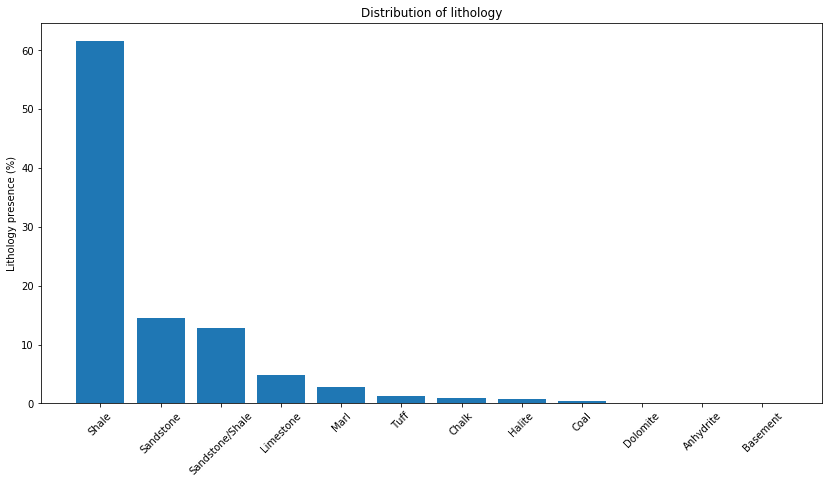

In [10]:
lithology_counts = data["FORCE_2020_LITHOFACIES_LITHOLOGY"].value_counts()
lithologies = []
fraction_present = []
N = len(data.index)
for item in lithology_counts.iteritems():
    lithologies.append(lithology_keys[item[0]])
    fraction_present.append(float(item[1])/N*100)

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
plt.title("Distribution of lithology")
ax.bar(x=np.arange(len(lithologies)), height=fraction_present)
ax.set_xticklabels(lithologies, rotation=45)
ax.set_xticks(np.arange(len(lithologies)))
ax.set_ylabel("Lithology presence (%)");


Note that the distribution of lithologies are highly skewed. A possible approach is to do a nested classification in two steps. The first step would be a binary classification task classifying the lithology as Shale or Other. If an instance belongs to the Other class, a multi-class classification task will classify the lithology as belonging to one of the other classes (excluding Shale)

In [11]:
lithology_counts_readable = pd.Series({lithology_keys[k]: v for k, v in lithology_counts.items()})
lithology_counts_readable

Shale              720803
Sandstone          168937
Sandstone/Shale    150455
Limestone           56320
Marl                33329
Tuff                15245
Chalk               10513
Halite               8213
Coal                 3820
Dolomite             1688
Anhydrite            1085
Basement              103
dtype: int64

The above printout shows the number of samples for each of the lithology classes

## Explanatory variables

The following variables are in the set of explanatory variables

* CALI - caliper, a representation of the measured diameter of a borhole along its depth
* RMED - medium deep reading resistivity log
* RDEP - deep reading resistivity log
* GR - gamma ray log, i.e. measurement of emitted gamma rays. Particularly useful as shales and sandstones typically have different gamma ray signatures
* PEF - photo electric factor log. Measurement of the photoelectric absorption factor. Useful for determining mineralogy, effected by heavy minerals
* RHOB - bulk density
* NPHI - neutron porosity log. Effect of the formation/rock on fast neutrons emitted by a source. Biggest effect is in Hydrogen, which is found mainly in pore fluids. The log principally responds to porosity, and can be seen as a measure of such.
* DTC - compressional wave velocity log (P-wave velocity)
* DEPTH_MD - depth log

The resistivity readings are taken horizontally at each position/reading in the well, and are expected to correlate.

In addition to the above variables, local gradients and rolling windows calculating mean, min and max are included in the set of explanatory variables


In [12]:
variables = data.columns.values
target_variable = "FORCE_2020_LITHOFACIES_LITHOLOGY"
explanatory_variables = [var for var in variables if var not in [target_variable, "WELL"]]
pd.Series(explanatory_variables, index=None)

0                 CALI
1                 RMED
2                 RDEP
3                   GR
4                  PEF
5                 RHOB
6                 NPHI
7                  DTC
8             DEPTH_MD
9        CALI_gradient
10       RMED_gradient
11       RDEP_gradient
12         GR_gradient
13        PEF_gradient
14       RHOB_gradient
15       NPHI_gradient
16        DTC_gradient
17    CALI_window_mean
18     CALI_window_min
19     CALI_window_max
20    RMED_window_mean
21     RMED_window_min
22     RMED_window_max
23    RDEP_window_mean
24     RDEP_window_min
25     RDEP_window_max
26      GR_window_mean
27       GR_window_min
28       GR_window_max
29     PEF_window_mean
30      PEF_window_min
31      PEF_window_max
32    RHOB_window_mean
33     RHOB_window_min
34     RHOB_window_max
35    NPHI_window_mean
36     NPHI_window_min
37     NPHI_window_max
38     DTC_window_mean
39      DTC_window_min
40      DTC_window_max
dtype: object

### Distribution of explanatory variables and correlation plots

In [13]:
original_variables = explanatory_variables[0:9] + [target_variable, "WELL"]
og_exp_vars = [var for var in original_variables if var not in [target_variable, "WELL"]]
original_data = data[original_variables]
#sample_original_data = original_data.sample(10000)
#sns.pairplot(sample_original_data, hue=target_variable, vars=og_exp_vars)

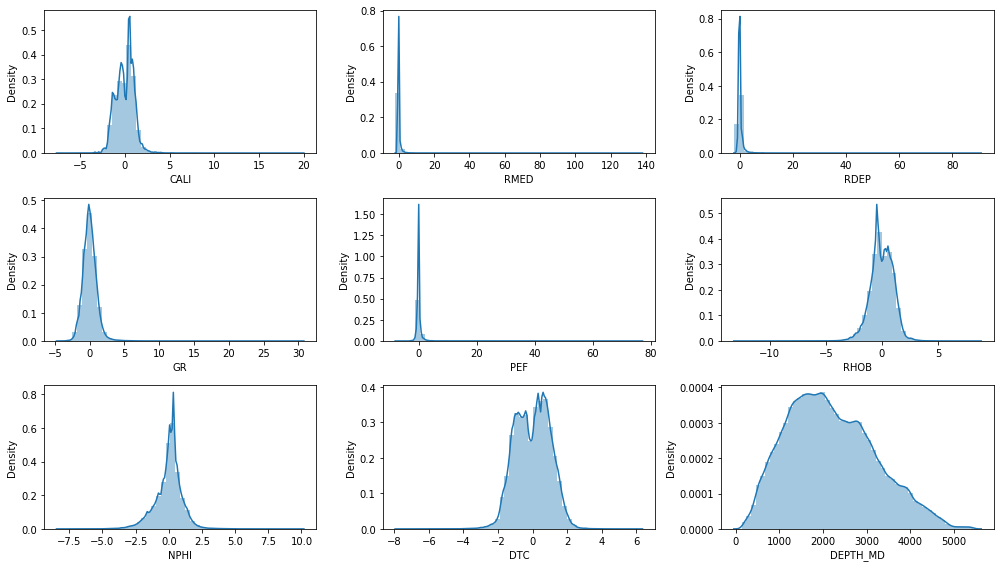

In [16]:
plt.figure(figsize=(14, 8))
for i, var in enumerate(og_exp_vars):
    plt.subplot(3, 3, i+1)
    plt.ylabel("")
    values = data[var]
    sns.distplot(values)
plt.tight_layout()

The above distribution plots shows the distirbution of the (original, i.e. not feature engineered) features of the preprocessed dataset. The distirbutions are all centered at 0 with unit standard deviation (except depth). 
Note that some of te variables are multi-modal, especially CALI, RHOB and DTC.

In [18]:
from scipy.stats import pearsonr
def corrfunc(x, y, ax=None, **kws):
    "Plot pearson correlation coeff in top left corner of a plot"
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

For computational reasons we consider a random sample of 10000 for the scatterplot matrix

In [19]:
num_samples = 10000
sampled_data = data.sample(num_samples)

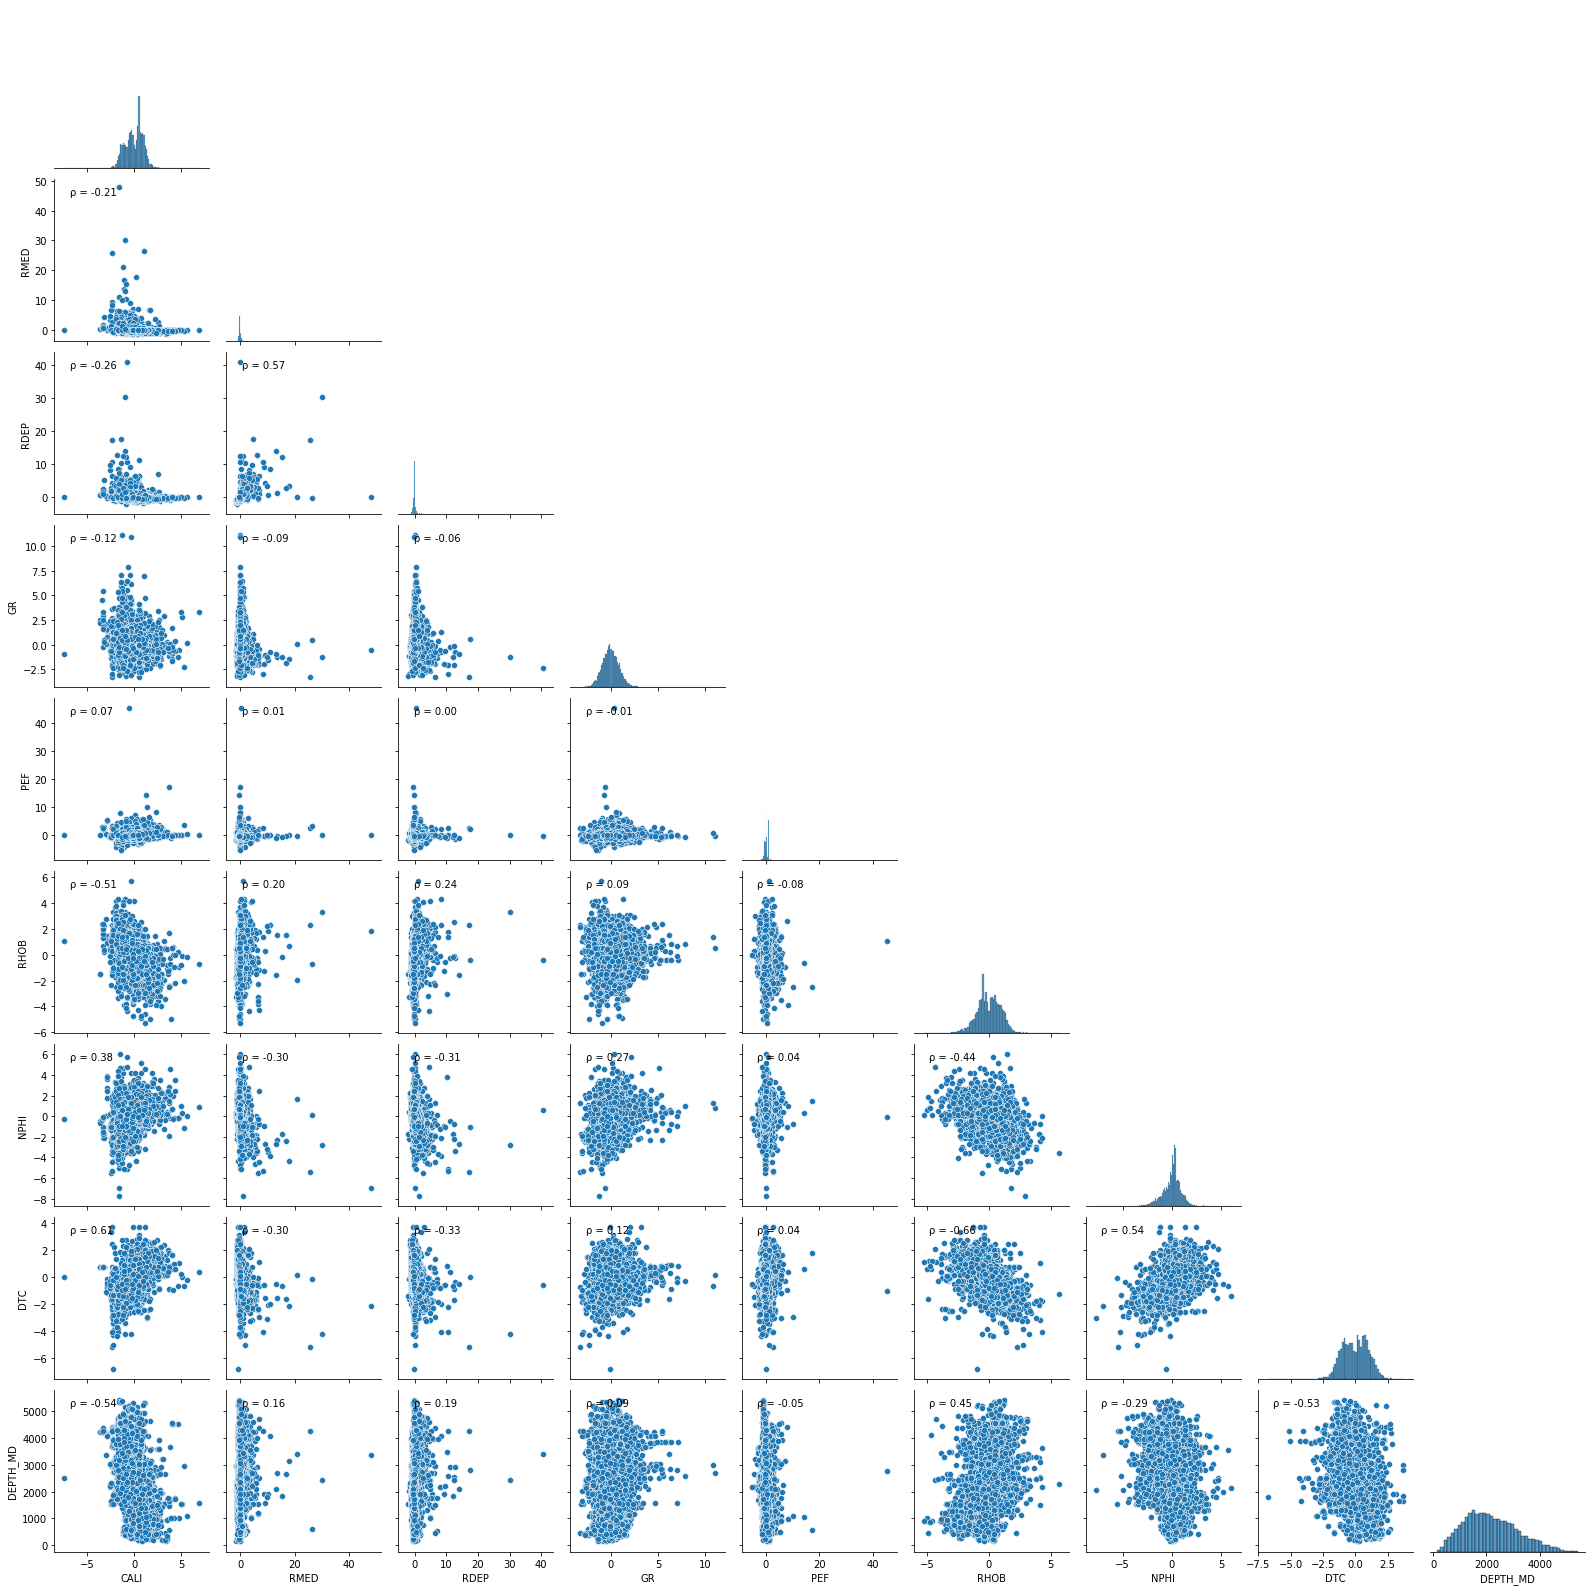

In [21]:
g = sns.pairplot(sampled_data, vars=og_exp_vars, corner=True)
g.map_lower(corrfunc)

In [22]:
data[og_exp_vars].corr(method="pearson")

,CALI,RMED,RDEP,GR,PEF,RHOB,NPHI,DTC,DEPTH_MD
CALI,1.000000,-0.215573,-0.246255,-0.123706,0.065760,-0.505060,0.383071,0.605280,-0.535527
RMED,-0.215573,1.000000,0.631927,-0.088072,-0.005149,0.195200,-0.278802,-0.286296,0.165808
RDEP,-0.246255,0.631927,1.000000,-0.052714,-0.006411,0.228253,-0.317143,-0.320303,0.191076
GR,-0.123706,-0.088072,-0.052714,1.000000,-0.020116,0.078310,0.285251,0.117187,0.091260
PEF,0.065760,-0.005149,-0.006411,-0.020116,1.000000,-0.080205,0.048515,0.043794,-0.053921
RHOB,-0.505060,0.195200,0.228253,0.078310,-0.080205,1.000000,-0.440577,-0.669663,0.447590
NPHI,0.383071,-0.278802,-0.317143,0.285251,0.048515,-0.440577,1.000000,0.537467,-0.288310
DTC,0.605280,-0.286296,-0.320303,0.117187,0.043794,-0.669663,0.537467,1.000000,-0.536142
DEPTH_MD,-0.535527,0.165808,0.191076,0.091260,-0.053921,0.447590,-0.288310,-0.536142,1.000000


The above matrix shows the (pearson) correlation coefficient between the (original) explanatory variables in the dataset.

THe following sets of variables are correlated with a correlation coefficient greater than 0.5;

CALI and {RHOB, DTC, DEPTH_MD} \
RMED and {RDEP} \
GR and {} \
PEF and {} \
RHOB and {CALI, DTC}\
NPHI and {DTC}\
DTC and {CALI, RHOB, NPHI, DEPTH_MD} \
DEPTH_MD and {CALI, DTC}

The correlation between DTC, RHOB and DEPTH_MD may be explained by the fact that, in general, greater depths results in a greater pressure which allows for higher velocities. There is also a general concensus that P-wave velocity is inversely proportional to density, which explain the negative correlation between density (RHOB) and P-wave velocity (DTC). \
The correlation between RMED and RDEP is also expected, they are simply resistivity readings taken at different depth into the rock (horizontally) at each position down the boreline.

## Correlation between the original and their corresponding engineered features

In [37]:
data[["CALI", "CALI_gradient", "CALI_window_mean",
       "CALI_window_min", "CALI_window_max"]].corr(method="pearson")

,CALI,CALI_gradient,CALI_window_mean,CALI_window_min,CALI_window_max
CALI,1.000000,0.000006,0.995982,0.992692,0.992987
CALI_gradient,0.000006,1.000000,-0.053987,-0.043659,-0.044516
CALI_window_mean,0.995982,-0.053987,1.000000,0.996389,0.996287
CALI_window_min,0.992692,-0.043659,0.996389,1.000000,0.986365
CALI_window_max,0.992987,-0.044516,0.996287,0.986365,1.000000


In [38]:
data[["RMED", "RMED_gradient", "RMED_window_mean",
       "RMED_window_min", "RMED_window_max"]].corr(method="pearson")

,RMED,RMED_gradient,RMED_window_mean,RMED_window_min,RMED_window_max
RMED,1.000000,0.000016,0.878344,0.796711,0.813324
RMED_gradient,0.000016,1.000000,-0.215258,-0.105512,-0.226839
RMED_window_mean,0.878344,-0.215258,1.000000,0.898804,0.912824
RMED_window_min,0.796711,-0.105512,0.898804,1.000000,0.673655
RMED_window_max,0.813324,-0.226839,0.912824,0.673655,1.000000


In [39]:
data[["RDEP", "RDEP_gradient", "RDEP_window_mean",
       "RDEP_window_min", "RDEP_window_max"]].corr(method="pearson")

,RDEP,RDEP_gradient,RDEP_window_mean,RDEP_window_min,RDEP_window_max
RDEP,1.000000,0.000112,0.939946,0.895332,0.911163
RDEP_gradient,0.000112,1.000000,-0.196521,-0.122932,-0.177603
RDEP_window_mean,0.939946,-0.196521,1.000000,0.947624,0.959135
RDEP_window_min,0.895332,-0.122932,0.947624,1.000000,0.830293
RDEP_window_max,0.911163,-0.177603,0.959135,0.830293,1.000000


In [40]:
data[["GR", "GR_gradient", "GR_window_mean",
       "GR_window_min", "GR_window_max"]].corr(method="pearson")

,GR,GR_gradient,GR_window_mean,GR_window_min,GR_window_max
GR,1.000000e+00,-4.131108e-07,0.983804,0.975192,0.975320
GR_gradient,-4.131108e-07,1.000000e+00,-0.124067,-0.105208,-0.107368
GR_window_mean,9.838041e-01,-1.240667e-01,1.000000,0.989785,0.990509
GR_window_min,9.751916e-01,-1.052080e-01,0.989785,1.000000,0.962761
GR_window_max,9.753202e-01,-1.073677e-01,0.990509,0.962761,1.000000


In [41]:
data[["PEF", "PEF_gradient", "PEF_window_mean",
       "PEF_window_min", "PEF_window_max"]].corr(method="pearson")

,PEF,PEF_gradient,PEF_window_mean,PEF_window_min,PEF_window_max
PEF,1.000000,-0.000075,0.933058,0.885303,0.887246
PEF_gradient,-0.000075,1.000000,-0.163486,-0.090574,-0.159773
PEF_window_mean,0.933058,-0.163486,1.000000,0.941256,0.942831
PEF_window_min,0.885303,-0.090574,0.941256,1.000000,0.789608
PEF_window_max,0.887246,-0.159773,0.942831,0.789608,1.000000


In [42]:
data[["RHOB", "RHOB_gradient", "RHOB_window_mean",
       "RHOB_window_min", "RHOB_window_max"]].corr(method="pearson")

,RHOB,RHOB_gradient,RHOB_window_mean,RHOB_window_min,RHOB_window_max
RHOB,1.000000,0.000004,0.983750,0.973433,0.971602
RHOB_gradient,0.000004,1.000000,-0.123625,-0.098230,-0.109987
RHOB_window_mean,0.983750,-0.123625,1.000000,0.987587,0.986929
RHOB_window_min,0.973433,-0.098230,0.987587,1.000000,0.951666
RHOB_window_max,0.971602,-0.109987,0.986929,0.951666,1.000000


In [43]:
data[["NPHI", "NPHI_gradient", "NPHI_window_mean",
       "NPHI_window_min", "NPHI_window_max"]].corr(method="pearson")

,NPHI,NPHI_gradient,NPHI_window_mean,NPHI_window_min,NPHI_window_max
NPHI,1.000000,0.000006,0.980831,0.968050,0.967928
NPHI_gradient,0.000006,1.000000,-0.129176,-0.106618,-0.110368
NPHI_window_mean,0.980831,-0.129176,1.000000,0.985459,0.985237
NPHI_window_min,0.968050,-0.106618,0.985459,1.000000,0.944412
NPHI_window_max,0.967928,-0.110368,0.985237,0.944412,1.000000


In [44]:
data[["DTC", "DTC_gradient", "DTC_window_mean",
       "DTC_window_min", "DTC_window_max"]].corr(method="pearson")

,DTC,DTC_gradient,DTC_window_mean,DTC_window_min,DTC_window_max
DTC,1.000000,0.000008,0.992923,0.987798,0.988728
DTC_gradient,0.000008,1.000000,-0.086134,-0.077675,-0.070699
DTC_window_mean,0.992923,-0.086134,1.000000,0.994742,0.994738
DTC_window_min,0.987798,-0.077675,0.994742,1.000000,0.980022
DTC_window_max,0.988728,-0.070699,0.994738,0.980022,1.000000


From the above correlation matrices we see that the original variable is uncorrelated with its gradient, while being close to perfecly correlated with its corresponding rolling window variables calculating the mean, min and max. This is a general result that holds for all considered variables. I am sure it is possible to prove this, and I might do it later.

### Plot well-logs for a given well

https://towardsdatascience.com/displaying-lithology-data-using-python-and-matplotlib-58b4d251ee7a for the below lithology plot

In [24]:
lithology_numbers = {0: {'lith':'Sandstone', 'lith_num':1, 'hatch': '..', 'color':'#ffff00'},
                 1: {'lith':'Sandstone/Shale', 'lith_num':2, 'hatch':'-.', 'color':'#ffe119'},
                 2: {'lith':'Shale', 'lith_num':3, 'hatch':'--', 'color':'#bebebe'},
                 3: {'lith':'Marl', 'lith_num':4, 'hatch':'', 'color':'#7cfc00'},
                 4: {'lith':'Dolomite', 'lith_num':5, 'hatch':'-/', 'color':'#8080ff'},
                 5: {'lith':'Limestone', 'lith_num':6, 'hatch':'+', 'color':'#80ffff'},
                 6: {'lith':'Chalk', 'lith_num':7, 'hatch':'..', 'color':'#80ffff'},
                 7: {'lith':'Halite', 'lith_num':8, 'hatch':'x', 'color':'#7ddfbe'},
                 8: {'lith':'Anhydrite', 'lith_num':9, 'hatch':'', 'color':'#ff80ff'},
                 9: {'lith':'Tuff', 'lith_num':10, 'hatch':'||', 'color':'#ff8c00'},
                 10: {'lith':'Coal', 'lith_num':11, 'hatch':'', 'color':'black'},
                 11: {'lith':'Basement', 'lith_num':12, 'hatch':'-|', 'color':'#ef138a'}}

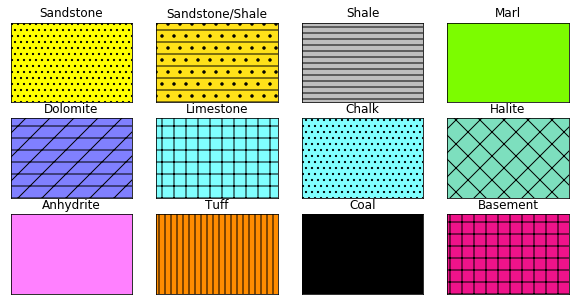

In [25]:
y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=4,nrows=3, sharex=True, sharey=True,
                         figsize=(10,5), subplot_kw={'xticks': [], 'yticks': []})

for ax, key in zip(axes.flat, lithology_numbers.keys()):
    ax.plot(x, y)
    ax.fill_betweenx(y, 0, 1, facecolor=lithology_numbers[key]['color'], hatch=lithology_numbers[key]['hatch'])
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 1)
    ax.set_title(str(lithology_numbers[key]['lith']))

The above plot shows a color-coding for the ligthologies in the dataset, which will be used later on for visualization purposes.

In [26]:
well_data = original_data[original_data["WELL"] == wells[42]]

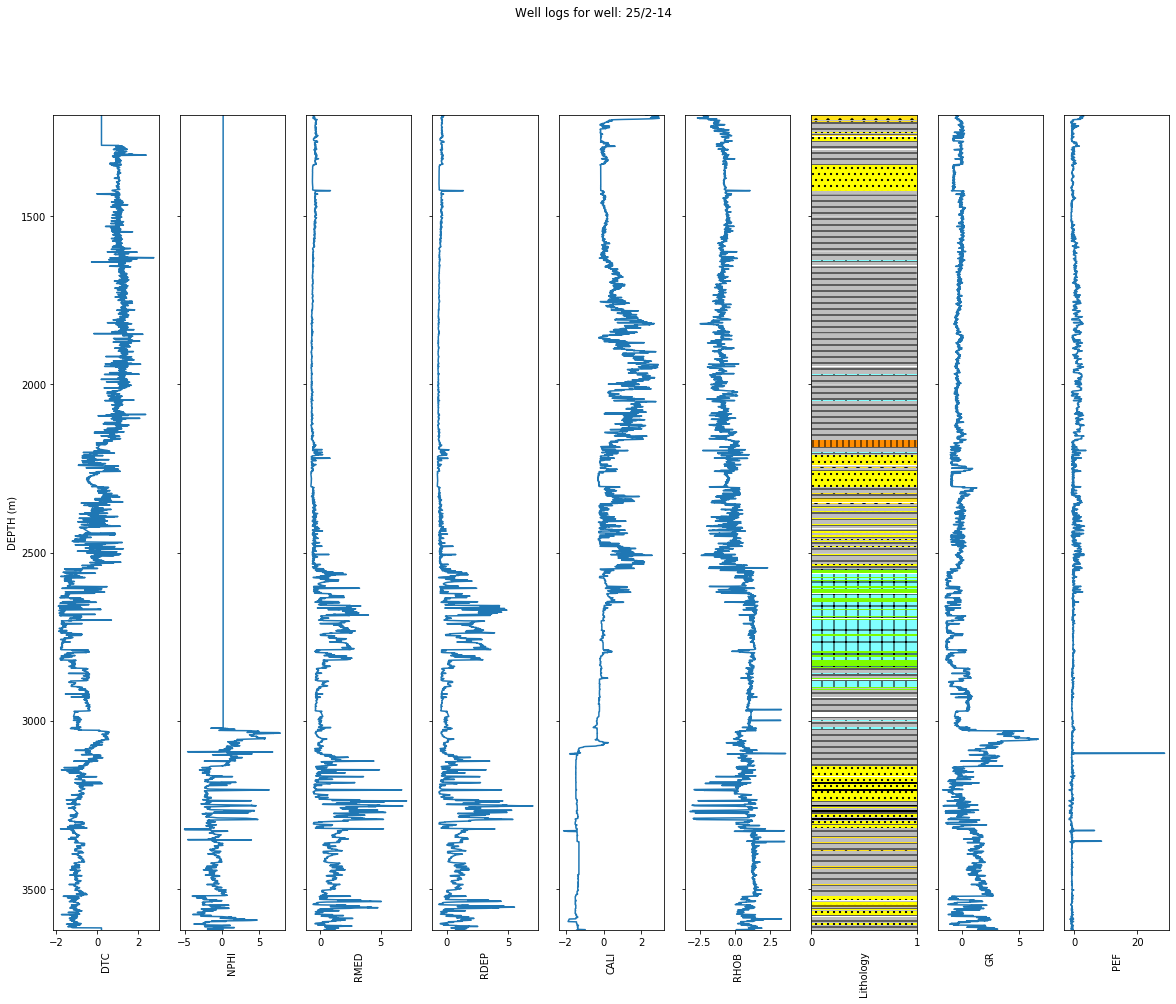

In [29]:
fig, axs = plt.subplots(1, len(well_data.columns)-2, figsize=(20,15), sharey=True)
plt.suptitle("Well logs for well: {}".format(well_data["WELL"].unique()[0]))

for ic, col in enumerate(set(well_data.columns)-set(["DEPTH_MD", "WELL"])):
    if col == target_variable:
        # plot color depending on lithology - fix this 
        #axs[ic].plot(well_data[target_variable], well_data["DEPTH_MD"], color="black", linewidth=0.5)
        axs[ic].set_xlabel("Lithology", rotation=90)
        axs[ic].set_xlim(0, 1)
        
        for key in lithology_numbers.keys():
            color = lithology_numbers[key]['color']
            hatch = lithology_numbers[key]['hatch']
            axs[ic].fill_betweenx(well_data["DEPTH_MD"], 0, 1, 
                                 where=(well_data[target_variable] == key), facecolor=color, hatch=hatch)
        axs[ic].set_xticks([0, 1])
        axs[ic].grid(which='major', color='lightgrey', linestyle='-')
        axs[ic].xaxis.set_ticks_position("bottom")
        axs[ic].xaxis.set_label_position("bottom")
        continue
    
    axs[ic].plot(well_data[col], well_data["DEPTH_MD"])
    axs[ic].set_xlabel(col, rotation=90)
    
    
axs[0].set_ylim(well_data["DEPTH_MD"].values[-1], well_data["DEPTH_MD"].values[0])
axs[0].set_ylabel("DEPTH (m)");

## Correlation plots, based on lithology

In [30]:
data['LITH'] = data[target_variable].map(lithology_keys)


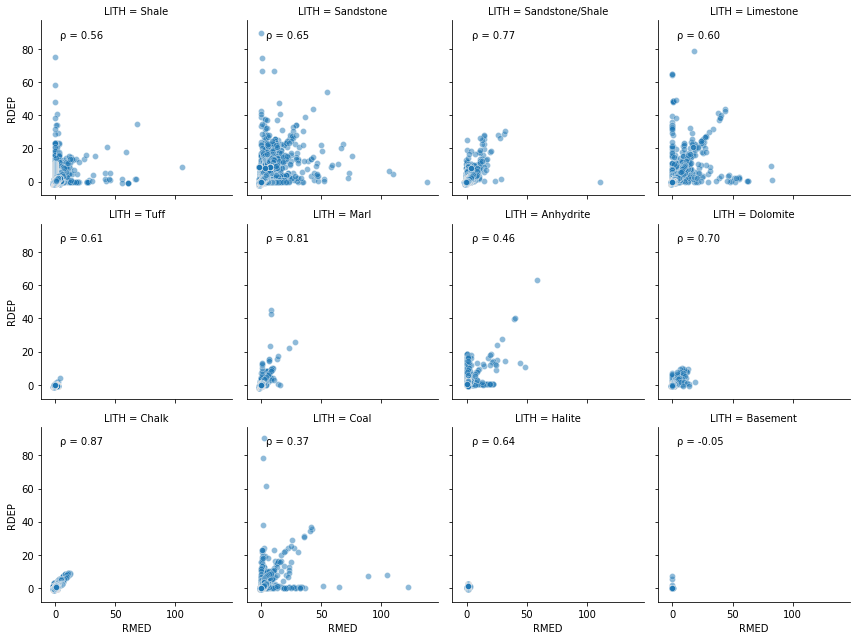

In [36]:
g = sns.FacetGrid(data, col="LITH", col_wrap=4)
g.map(sns.scatterplot, "RMED", "RDEP", alpha=0.5)
g.map(corrfunc, "RMED", "RDEP")

The above scatterplot matrix shows a plot of RMED vs RDEP for every lithology class in the dataset. As expected there is a strong correlation between the two variables (at least for the ones with enough data, see Basement)

In [55]:
data.columns

Index(['CALI', 'RMED', 'RDEP', 'GR', 'PEF', 'RHOB', 'NPHI', 'DTC', 'WELL',
       'DEPTH_MD', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 'CALI_gradient',
       'RMED_gradient', 'RDEP_gradient', 'GR_gradient', 'PEF_gradient',
       'RHOB_gradient', 'NPHI_gradient', 'DTC_gradient', 'CALI_window_mean',
       'CALI_window_min', 'CALI_window_max', 'RMED_window_mean',
       'RMED_window_min', 'RMED_window_max', 'RDEP_window_mean',
       'RDEP_window_min', 'RDEP_window_max', 'GR_window_mean', 'GR_window_min',
       'GR_window_max', 'PEF_window_mean', 'PEF_window_min', 'PEF_window_max',
       'RHOB_window_mean', 'RHOB_window_min', 'RHOB_window_max',
       'NPHI_window_mean', 'NPHI_window_min', 'NPHI_window_max',
       'DTC_window_mean', 'DTC_window_min', 'DTC_window_max', 'LITH'],
      dtype='object')

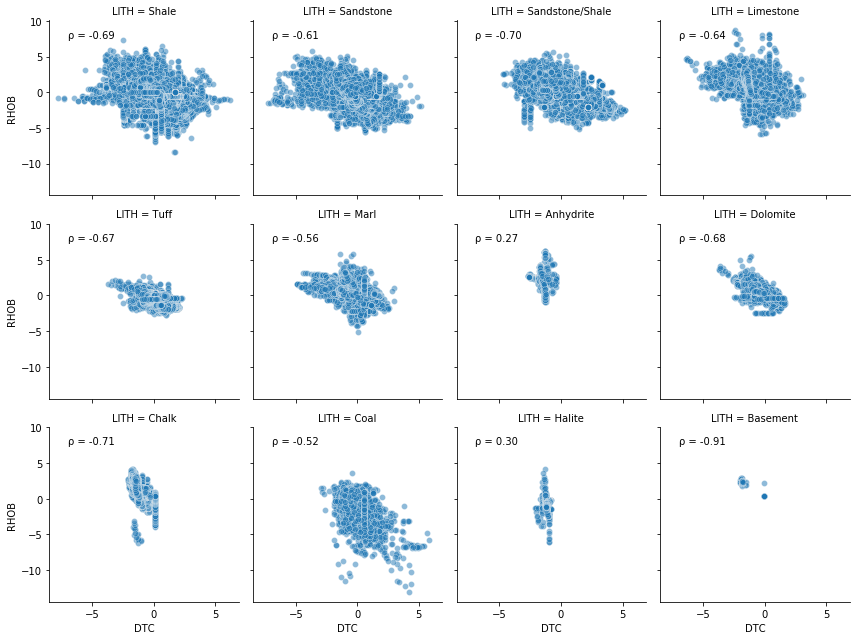

In [45]:
g = sns.FacetGrid(data, col="LITH", col_wrap=4)
g.map(sns.scatterplot, "DTC", "RHOB", alpha=0.5)
g.map(corrfunc, "DTC", "RHOB")

From the above scatterplot we see DTC (P-wave velocity) plotted against RHOB (bulk density) for each lithology in the dataset. The correlation coefficient is marked in the upper-left corner of each plot.

## Setting up a mathematical model 


The below model aims to classify the lithology of the subsurface $y_i$ given a set of well-log measurements $\bf{x_i}$ for instances $i = 1, ..., N$. N is the number of samples in the dataset.

The relationship between the explanatory variables $\bf{x_i}$ and the target $y_i$ is categorical. We model the problem by outputing a probability distribution of class membership, and classify according to the maximum probability for each instance. The relationship between the explanatory variables and the categorical probability distribution is assumed to be non-linear and modelled by a neural network $f(\bf{x_i}, \phi)$ with parameters $\phi$ equipped with a softmax activation function in the final layer. A heteroscedastic noise model $g(\bf{x_i}, \psi)$ with parameters $\psi$ is assumed, to capture the measurement noise of the well-logs. This is to allow for different level of noise for different instances. The noise level for each class membership is assumed to be independent, resulting in a diagonal covariance matrix $\Sigma_i$. The number of classes is $K$.

\begin{equation}
    \begin{split}
        & y_i = argmax(\bf{z_i} + \bf{\varepsilon_i}) \in \{1, .., K\}, \; i = 1, ..., N \\
        & z_i = f(\bf{x_i}, \phi) \in \mathbb{R}^K, \; i = 1, ..., N \\
        & \bf{\varepsilon_i} \sim \mathcal{N}_K(0, \Sigma_i) \in \mathbb{R}^{K}, \; i = 1, ..., N \\
        & \{\Sigma_i\}_{i, j} = \begin{cases}
                                    & g(\bf{x_i}, \psi), \; i = j \\
                                    & 0, \quad \quad i \ne j
                                \end{cases}, \; i = 1, ..., N. \; j = 1, ..., K \\
        & \Sigma_i = I_{K}\cdot (\mathbb{1}^T_K \cdot g(\bf{x_i}, \psi)) \in \mathbb{R}^{K\times K}, \; I_{K} \in \mathbb{R}^{K \times K}, \; \mathbb{1}_K \in \mathbb{R}^{1 \times K}, \; g(\bf{x_i}, \psi) \in \mathbb{R}^{1 \times K}   \\
    \end{split}
\end{equation}

For a fully Bayesian treatment we need to specify prior distirbution for the parameters of the neural network and noise model, namely $\phi$ and $\psi$. The distribution of the parameters are then updated using VI during training, approximating the posterior distributions.